In [1]:
# !pip install numpy
# !pip install pandas
# !pip install scikit-learn
# !pip install matplotlib
# !pip install seaborn
# !pip install tensorflow

<a id="1"></a>
# <p style="padding:10px;background-color:#f3d23aff;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">7 of the Most Used Feature Engineering Methods</p>

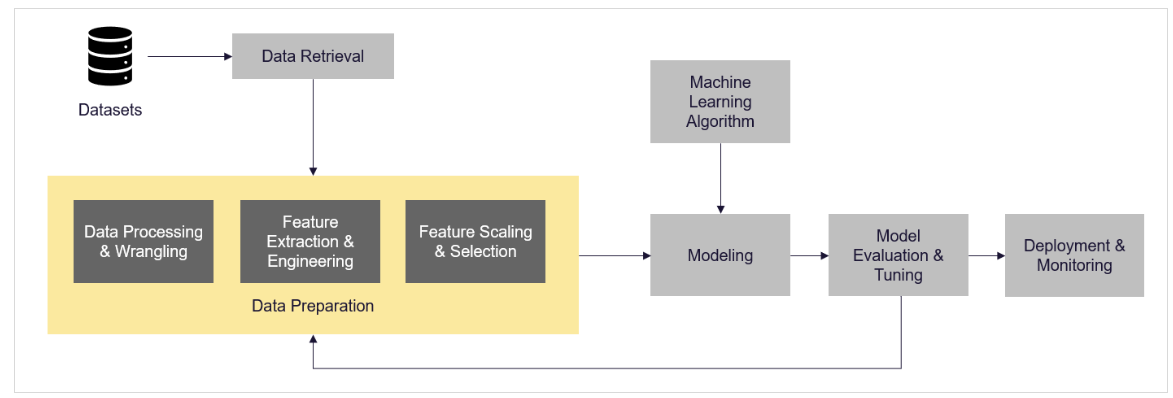
*A standard Machine Learning pipeline - Inspired by ([Sarkar et al., 2018](zotero://select/library/items/AFNMA9ZP))*

<a id="1"></a>
# <p style="padding:10px;background-color:#f3d23aff;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">1. Encoding</p>

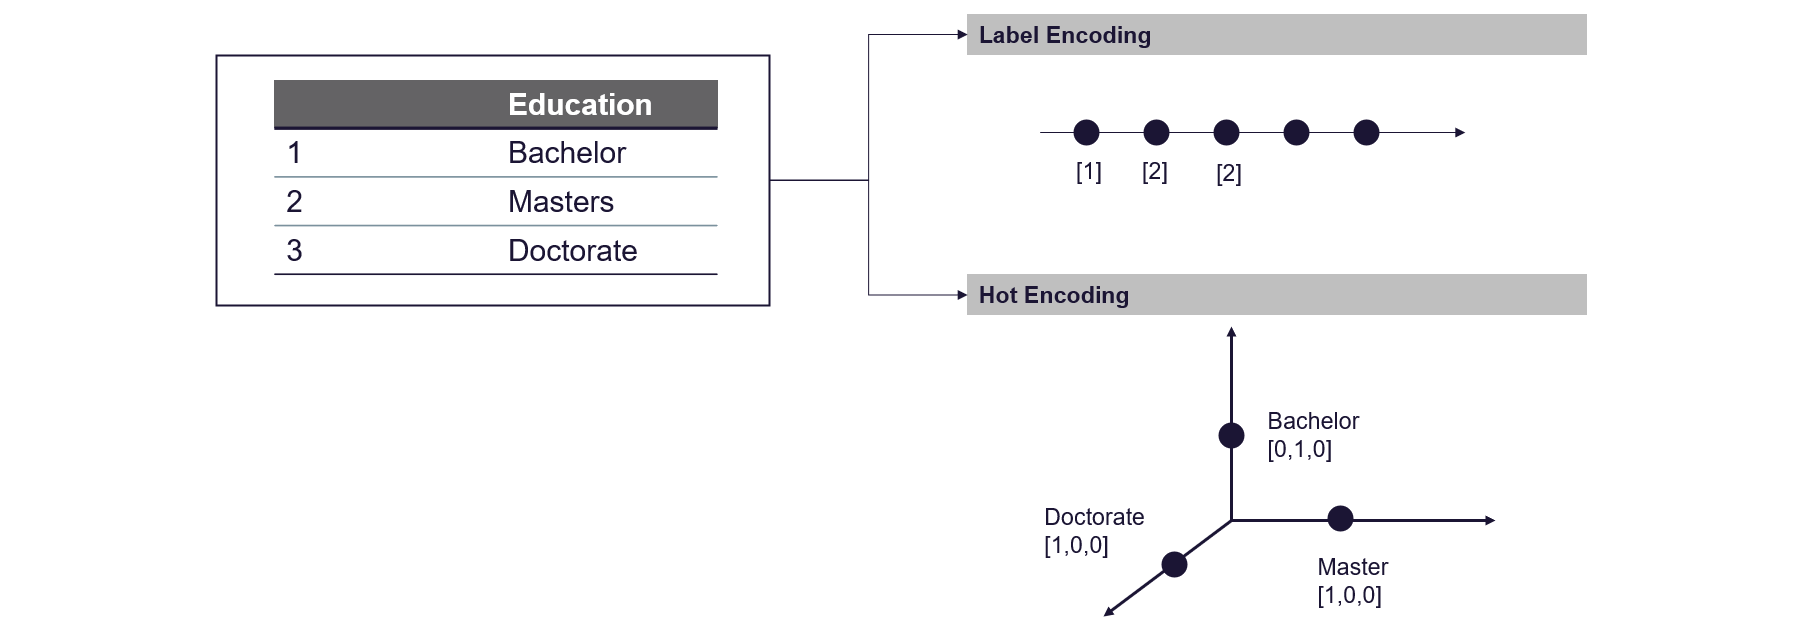

<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color: #646365ff;;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">1.1 Label Encoding
    </h2>
</div>

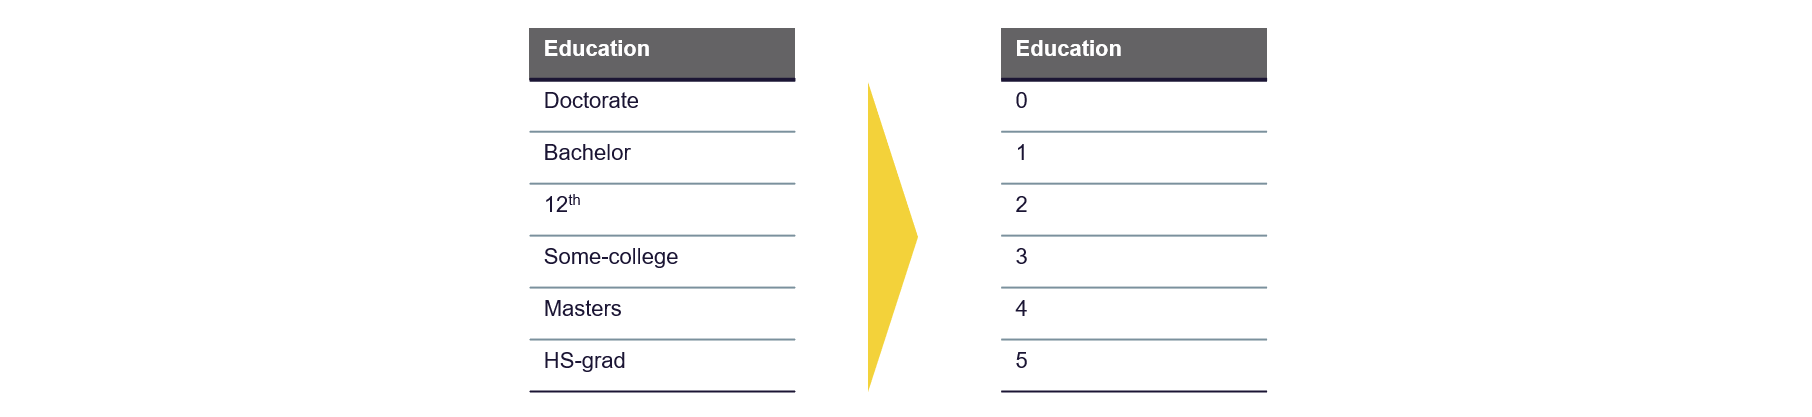

In [2]:
import pandas as pd

# load dataset - census income
census_income = pd.read_csv(r'../input/income/train.csv')

In [3]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(census_income["education"])

census_income["education_labeled"] = le.transform(census_income["education"])

display(census_income[["education", "education_labeled"]])

,education,education_labeled
0,Doctorate,10
1,12th,2
2,Bachelors,9
3,7th-8th,5
4,Some-college,15
...,...,...
43952,Bachelors,9
43953,HS-grad,11
43954,Some-college,15
43955,Bachelors,9


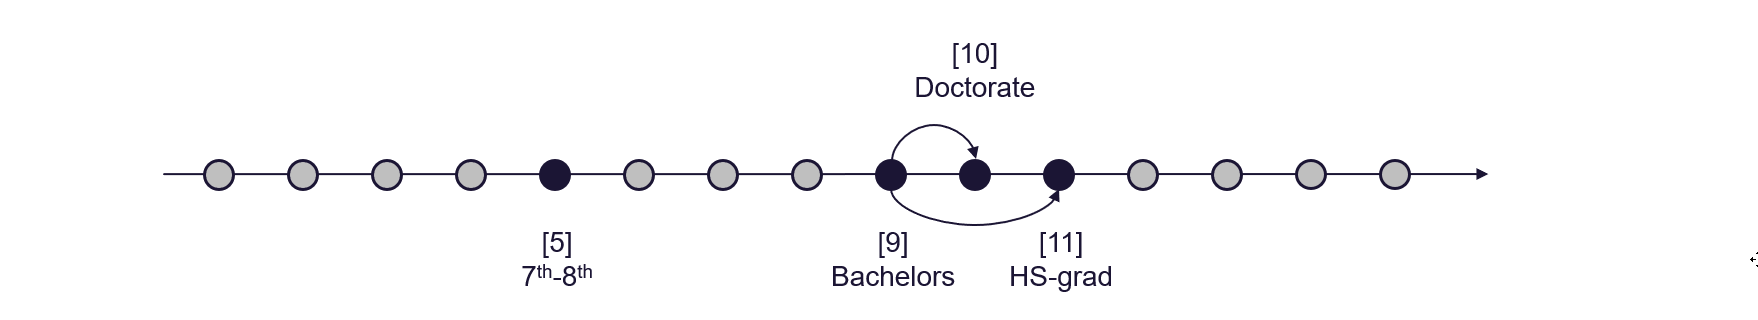

In [4]:
education_labels = {'Doctorate':5, 'Masters':4, 'Bachelors':3, 'HS-grad':2, '12th':1, '11th':0}

census_income['education_labeled_pandas']=census_income['education'].map(education_labels)

census_income[["education", "education_labeled_pandas"]]

,education,education_labeled_pandas
0,Doctorate,5.0
1,12th,1.0
2,Bachelors,3.0
3,7th-8th,NaN
4,Some-college,NaN
...,...,...
43952,Bachelors,3.0
43953,HS-grad,2.0
43954,Some-college,NaN
43955,Bachelors,3.0


In [5]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

def compare_linea_regression_for_label_encoding():
    '''
    1. Categorical values to numerical: Apply random label encoding and defined mapping
    2. Build a simple linear regression model and plot it
    :return: education_labeled_random, education_labeled_domain_know_how
    '''

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    ###########################################################################################
    # Load data: Census income data set
    ###########################################################################################
    census_income = pd.read_csv(r'../input/income/train.csv')

    ###########################################################################################
    # Plot diagrams
    ###########################################################################################
    def plot_regression_plot(education_labels_sorted):
        census_income['education_labeled_sorted'] = census_income['education'].map(education_labels_sorted)
        education_sorted_labeled = census_income[["education", "education_labeled_sorted", "income_>50K"]]

        # calculate percentage of income_>50k
        education_sorted_labeled_grouped = education_sorted_labeled[
            ~education_sorted_labeled["education_labeled_sorted"].isnull()].groupby(by=["education"]).mean().sort_values(
            by=["education_labeled_sorted"])

        reg = LinearRegression().fit(education_sorted_labeled_grouped[["education_labeled_sorted"]],
                                     education_sorted_labeled_grouped["income_>50K"])
        y_pred = reg.predict(education_sorted_labeled_grouped[["education_labeled_sorted"]])

        return y_pred, education_sorted_labeled_grouped

    ###########################################################################################
    # label encoding column "education": Version 1 - Random Order
    ###########################################################################################
    title = "Label encoding: Random Order"
    education_labels_sorted = {"Bachelors": 1, "Doctorate": 2, "Masters": 3, "HS-grad": 4}
    y_pred, education_labeled_random = plot_regression_plot(education_labels_sorted)

    ax[0].plot(education_labeled_random["education_labeled_sorted"], y_pred, 'o-', color='black')
    ax[0].bar(education_labeled_random["education_labeled_sorted"], education_labeled_random["income_>50K"], color='#f3d23aff', label="Linear Model")
    ax[0].set_ylabel("Probability >50k income")
    ax[0].legend()
    ax[0].set_title(title)
    ax[0].set_xlabel("Education Numeric")

    ###########################################################################################
    # label encoding column "education": Version 2 - Order based on domain know-how
    ###########################################################################################
    title = "Label encoding: Order based on domain know-how"
    education_labels_sorted = {"HS-grad": 1, "Bachelors": 2, "Masters": 3, "Doctorate": 4}
    y_pred, education_labeled_domain_know_how= plot_regression_plot(education_labels_sorted)

    ax[1].plot(education_labeled_domain_know_how["education_labeled_sorted"], y_pred, 'o-', color='black')
    ax[1].bar(education_labeled_domain_know_how["education_labeled_sorted"], education_labeled_domain_know_how["income_>50K"], color='grey', label="Linear Model")
    ax[1].set_ylabel("Probability >50k income")
    ax[1].legend()
    ax[1].set_title(title)
    ax[1].set_xlabel("Education Numeric")

    return education_labeled_random, education_labeled_domain_know_how

###########################################################################################################
Education randomly marked
###########################################################################################################


,education_labeled_sorted,income_>50K
education,,
Bachelors,1.0,0.414046
Doctorate,2.0,0.716418
Masters,3.0,0.555184
HS-grad,4.0,0.156653


###########################################################################################################
Education labeled using domain know how
###########################################################################################################


,education_labeled_sorted,income_>50K
education,,
HS-grad,1.0,0.156653
Bachelors,2.0,0.414046
Masters,3.0,0.555184
Doctorate,4.0,0.716418


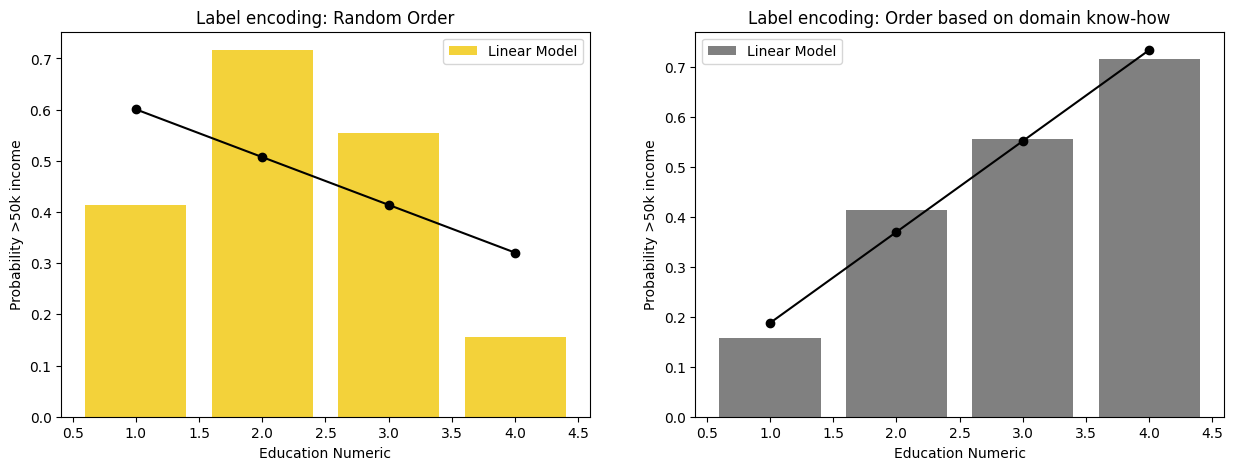

In [6]:
education_labeled_random, education_labeled_domain_know_how = compare_linea_regression_for_label_encoding()

print("###########################################################################################################")
print("Education randomly marked")
print("###########################################################################################################")
display(education_labeled_random)

print("###########################################################################################################")
print("Education labeled using domain know how")
print("###########################################################################################################")
display(education_labeled_domain_know_how)

<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color: #646365ff;;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">1.2 Hot Encoding (Categorical variables)
    </h2>
</div>

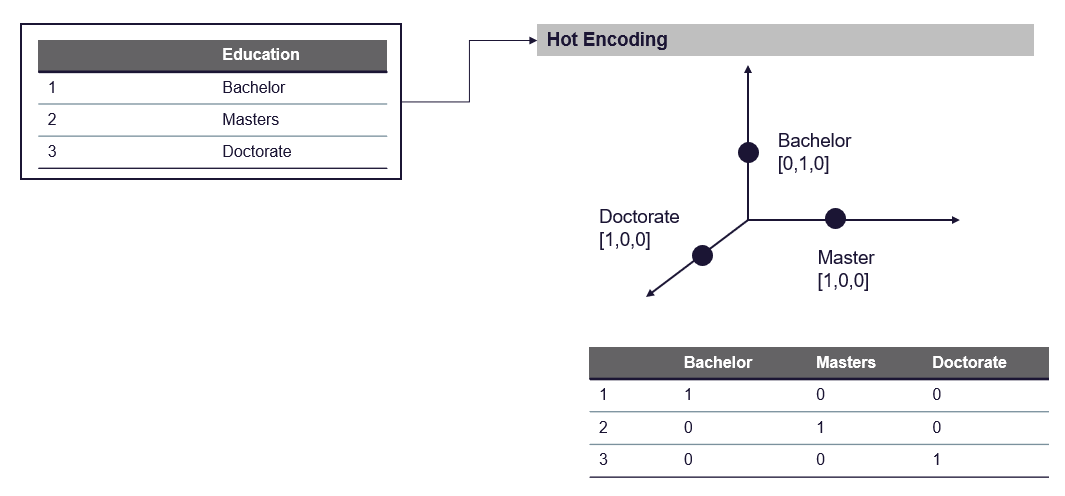

In [7]:
from sklearn import preprocessing
import pandas as pd

education_one_hot_pandas = pd.get_dummies(census_income["education"], prefix='education')

lb = preprocessing.LabelBinarizer()
lb.fit(census_income["education"])

education_one_hot_sklearn_binar = pd.DataFrame(lb.transform(census_income["education"]), columns=lb.classes_)
education_one_hot_sklearn_binar.head(2)

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.preprocessing import OneHotEncoder
from seaborn import load_dataset

ohe = OneHotEncoder()
ohe.fit(census_income[['education']])

education_one_hot_sklearn = pd.DataFrame(ohe.transform(census_income[["education"]]).toarray(), columns=ohe.categories_[0])
education_one_hot_sklearn.head(3)

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id="1"></a>
# <p style="padding:10px;background-color:#f3d23aff;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">2. Hashing</p>

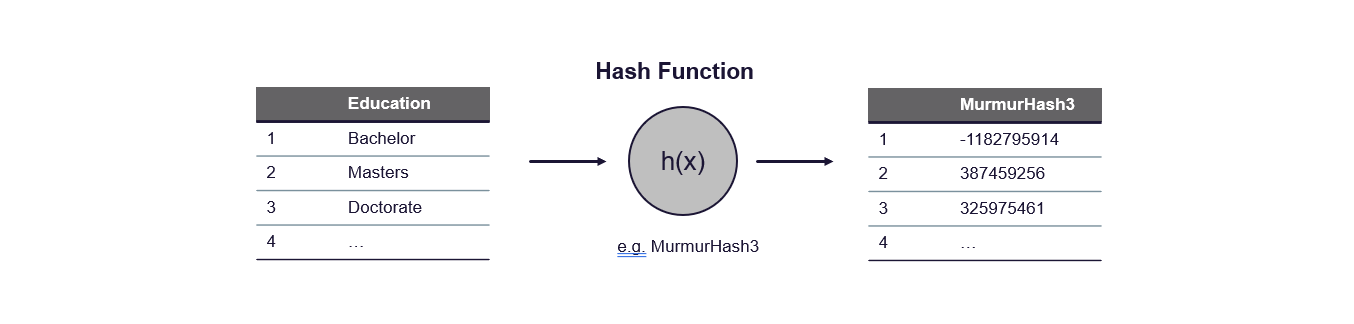

In [9]:
import sklearn 
import pandas as pd

# load data set
census_income = pd.read_csv(r'../input/income/train.csv')
education_feature = census_income.groupby(by=["education"]).count().reset_index()["education"].to_frame()

############################################################################################################
# Apply the hash function, here MurmurHash3 
############################################################################################################
def hash_function(row):
    return(sklearn.utils.murmurhash3_32(row.education))

education_feature["education_hash"] = education_feature.apply(hash_function, axis=1)
education_feature

,education,education_hash
0,10th,611946777
1,11th,1907886797
2,12th,960033297
3,1st-4th,-918906142
4,5th-6th,211780192
5,7th-8th,-1858991020
6,9th,1219543683
7,Assoc-acdm,-1621657589
8,Assoc-voc,334383773
9,Bachelors,-1182795914


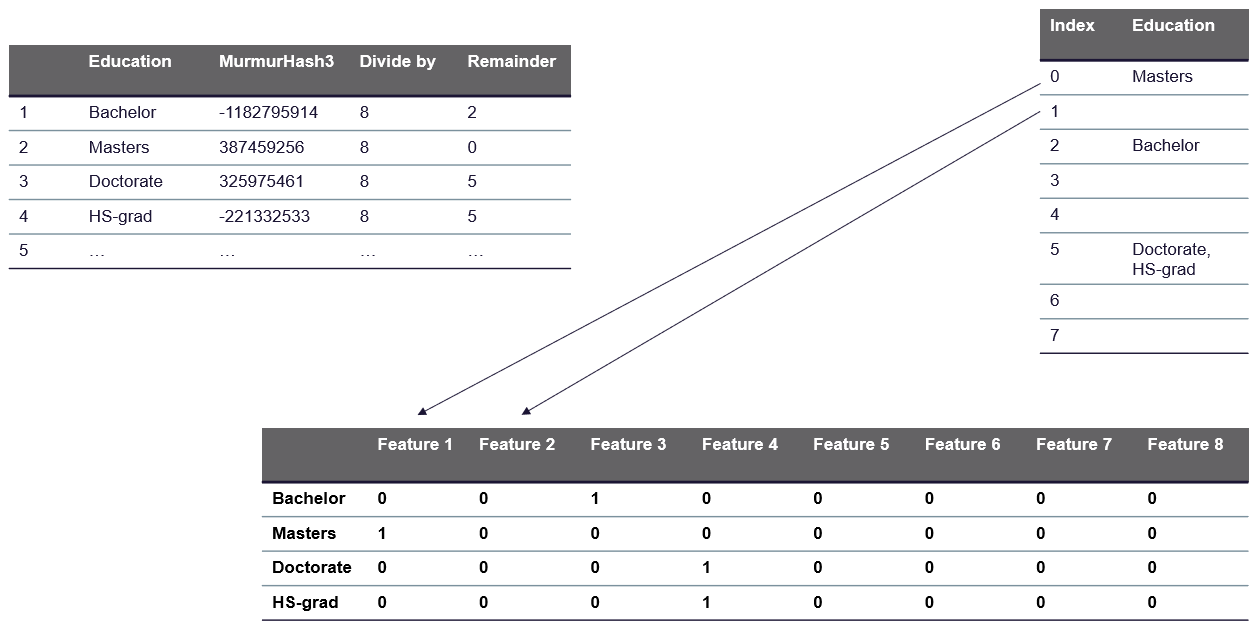

In [10]:
############################################################################################################
# Apply mod function
############################################################################################################
n_features = 8

def mod_function(row):
    return(abs(row.education_hash) % n_features)

education_feature["education_hash_mod"] = education_feature.apply(mod_function, axis=1)
education_feature

,education,education_hash,education_hash_mod
0,10th,611946777,1
1,11th,1907886797,5
2,12th,960033297,1
3,1st-4th,-918906142,6
4,5th-6th,211780192,0
5,7th-8th,-1858991020,4
6,9th,1219543683,3
7,Assoc-acdm,-1621657589,5
8,Assoc-voc,334383773,5
9,Bachelors,-1182795914,2


<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color: #646365ff;;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">2.1 Hashing Vectorizer
    </h2>
</div>

In [11]:
from sklearn.feature_extraction.text import HashingVectorizer

# define Feature Hashing Vectorizer
vectorizer = HashingVectorizer(n_features=8, norm=None, alternate_sign=False, ngram_range=(1,1), binary=True)

# fit the hashing vectorizer and transform the education column
X = vectorizer.fit_transform(education_feature["education"])

# transformed and raw column to data frame
df = pd.DataFrame(X.toarray()).assign(education = education_feature["education"])
display(df)

,0,1,2,3,4,5,6,7,education
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10th
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11th
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12th
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1st-4th
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5th-6th
5,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,7th-8th
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9th
7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Assoc-acdm
8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Assoc-voc
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Bachelors


In [12]:
import pandas as pd
from sklearn.feature_extraction import FeatureHasher

test = pd.DataFrame({'type': education_feature["education"].to_list()})
h = FeatureHasher(n_features=8, input_type='string')
f = h.fit_transform(test.type)
df = pd.DataFrame(f.toarray())

df

,0,1,2,3,4,5,6,7
0,0.0,-1.0,0.0,-1.0,0.0,-2.0,0.0,0.0
1,0.0,0.0,0.0,-1.0,0.0,-3.0,0.0,0.0
2,0.0,0.0,0.0,-1.0,0.0,-2.0,0.0,1.0
3,-1.0,-1.0,0.0,-2.0,0.0,-2.0,0.0,-1.0
4,1.0,-1.0,0.0,-2.0,1.0,-2.0,0.0,0.0
5,1.0,-2.0,0.0,-2.0,0.0,-2.0,0.0,0.0
6,0.0,1.0,0.0,-1.0,0.0,-1.0,0.0,0.0
7,0.0,-3.0,1.0,2.0,1.0,0.0,1.0,-2.0
8,0.0,-3.0,0.0,1.0,0.0,0.0,1.0,-2.0
9,0.0,0.0,1.0,1.0,1.0,-1.0,-1.0,0.0


<a id="1"></a>
# <p style="padding:10px;background-color:#f3d23aff;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">3. Binning / Bucketizing (Categorical variables)</p>

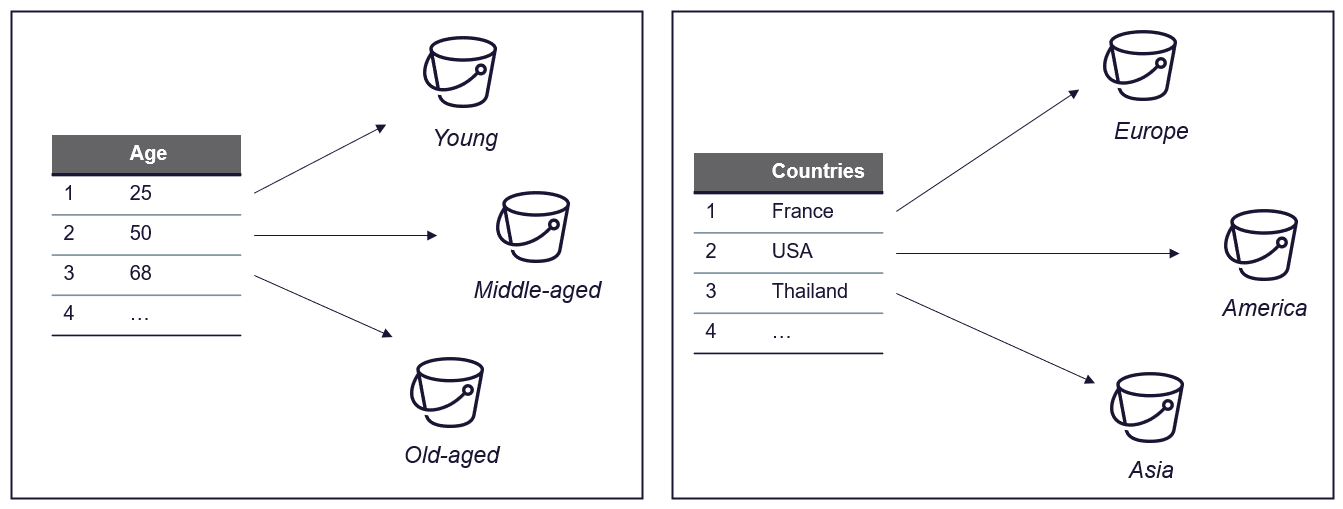

### Bucketizing using Pandas

Text(0.5, 0, 'Age')

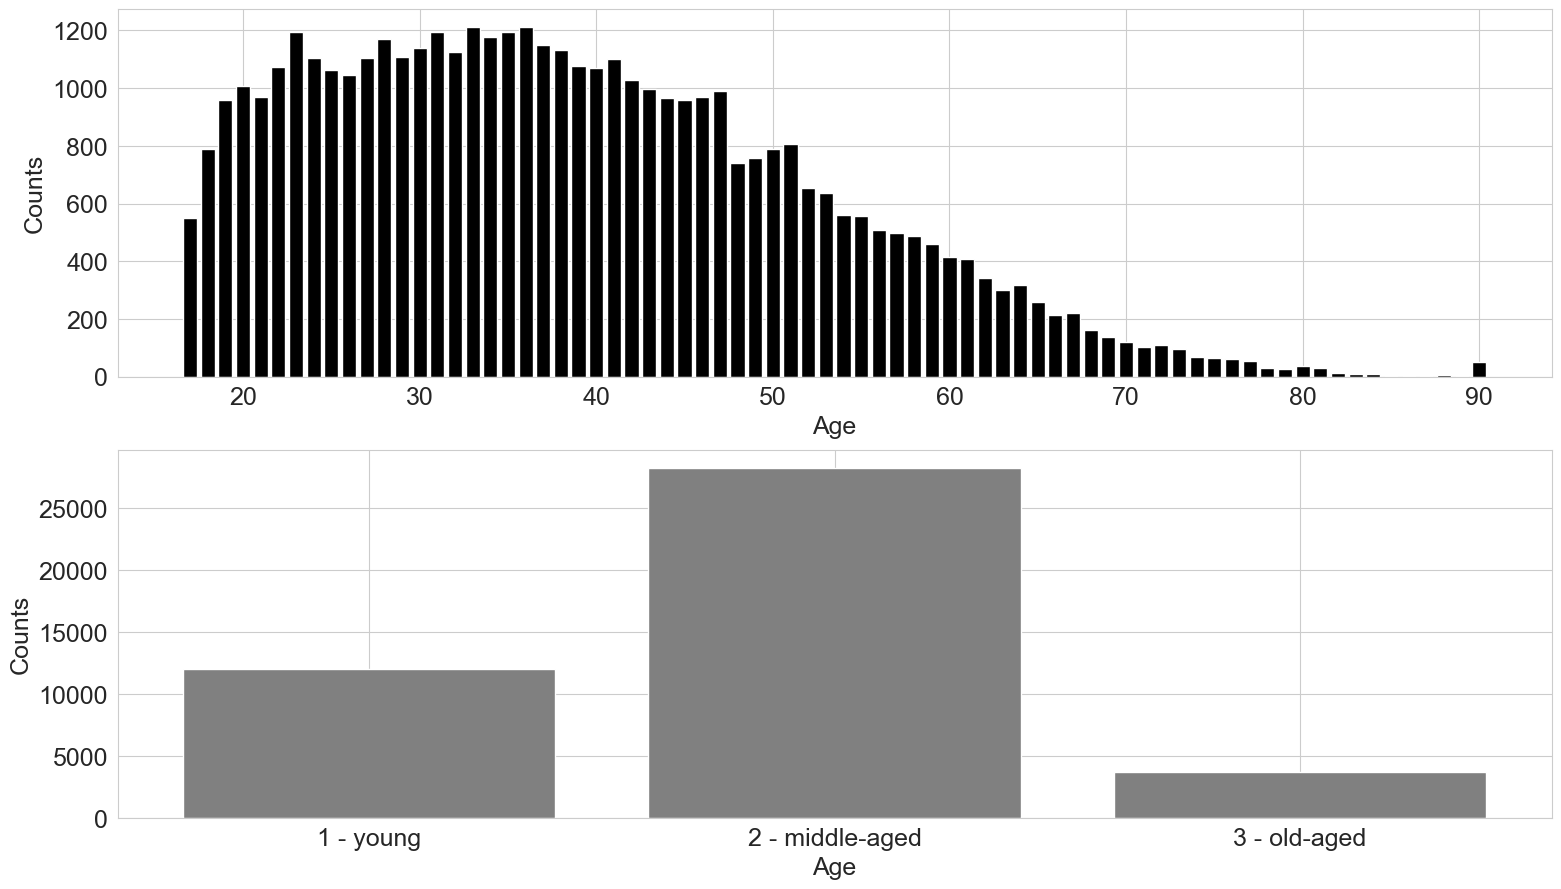

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# creating a dictionary
sns.set_style("whitegrid")
plt.rc('font', size=18) #controls default text size
plt.rc('axes', titlesize=18) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=18) #fontsize of the x tick labels
plt.rc('ytick', labelsize=18) #fontsize of the y tick labels
plt.rc('legend', fontsize=18) #fontsize of the legend

# load dataset - census income
census_income = pd.read_csv(r'../input/income/train.csv')

# define figure
fig, (ax1, ax2) = plt.subplots(2)
fig.set_size_inches(18.5, 10.5)

# plot age histogram
age_count = census_income.groupby(by=["age"])["age"].count()
ax1.bar(age_count.index, age_count, color='black')
ax1.set_ylabel("Counts")
ax1.set_xlabel("Age")

# binning age
def age_bins(age):
    if age < 29:
        return "1 - young"
    if age < 60 and age >= 29:
        return "2 - middle-aged"
    else:
        return "3 - old-aged"

# apply trans. function
census_income["age_bins"] = census_income["age"].apply(age_bins)

# group all entries of the same bin
age_bins_df = census_income.groupby(by=["age_bins"])["age_bins"].count()

ax2.bar(age_bins_df.index, age_bins_df, color='grey')
ax2.set_ylabel("Counts")
ax2.set_xlabel("Age")

### Bucketizing using Tensorflow tf.feature_column

In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

# load dataset - census income
census_income = pd.read_csv(r'../input/income/train.csv')
data = census_income.to_dict('list')

# A utility method to show transromation from feature column
def demo(feature_column):
    feature_layer = layers.DenseFeatures(feature_column)
    return feature_layer(data).numpy()
    
age = feature_column.numeric_column("age")
age_buckets = feature_column.bucketized_column(age, boundaries=[30,50])
buckets = demo(age_buckets)

# add buckets to data set
buckets_tensorflow = pd.DataFrame(buckets)

# define boundaries for buckets
boundary1 = 30
boundary2 = 50

# define column names for buckets
bucket1=f"age<{boundary1}"
bucket2=f"{boundary1}<age<{boundary2}"
bucket3=f"age>{boundary2}"

buckets_tensorflow_renamed = buckets_tensorflow.rename(columns = {0:bucket1,
                                                                    1:bucket2,
                                                                    2:bucket3})

buckets_tensorflow_renamed.assign(age=census_income["age"]).head(7)

,age<30,30<age<50,age>50,age
0,0.0,0.0,1.0,67
1,1.0,0.0,0.0,17
2,0.0,1.0,0.0,31
3,0.0,0.0,1.0,58
4,1.0,0.0,0.0,25
5,0.0,0.0,1.0,59
6,0.0,0.0,1.0,70


### Bucketizing using Sklearn

In [15]:
from sklearn.preprocessing import KBinsDiscretizer

est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit(census_income[["age"]])

buckets = est.transform(census_income[["age"]])

# add buckets column to data frame
census_income_bucketized = census_income.assign(buckets=buckets)[["age", "buckets"]]
census_income_bucketized

,age,buckets
0,67,2.0
1,17,0.0
2,31,0.0
3,58,1.0
4,25,0.0
...,...,...
43952,52,1.0
43953,19,0.0
43954,30,0.0
43955,46,1.0


## Example 3

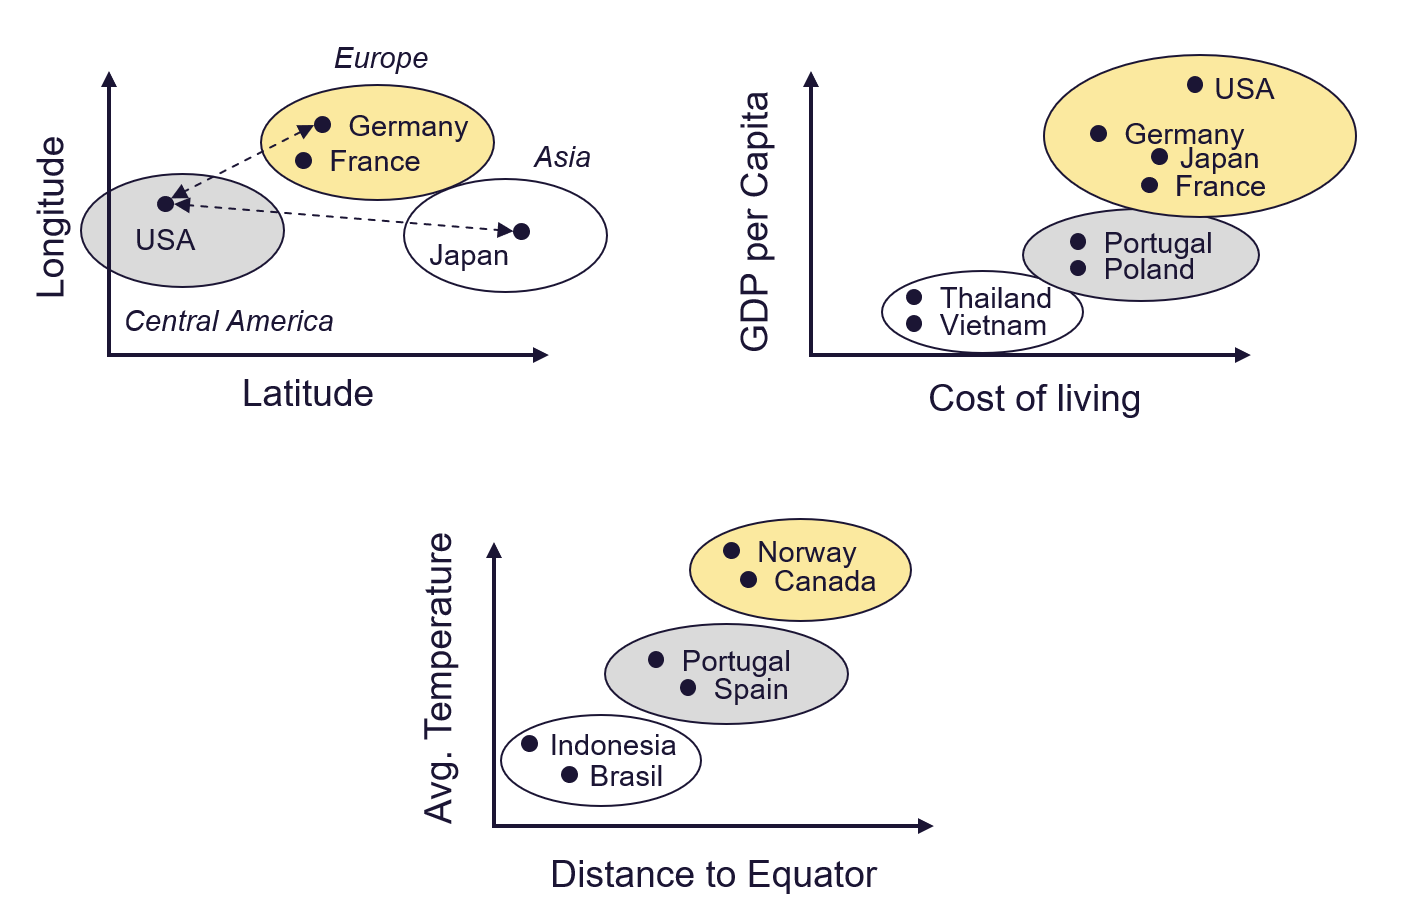

<a id="1"></a>
# <p style="padding:10px;background-color:#f3d23aff;margin:0;color:black;font-family:Trebuchet MS;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">4. Transform</p>

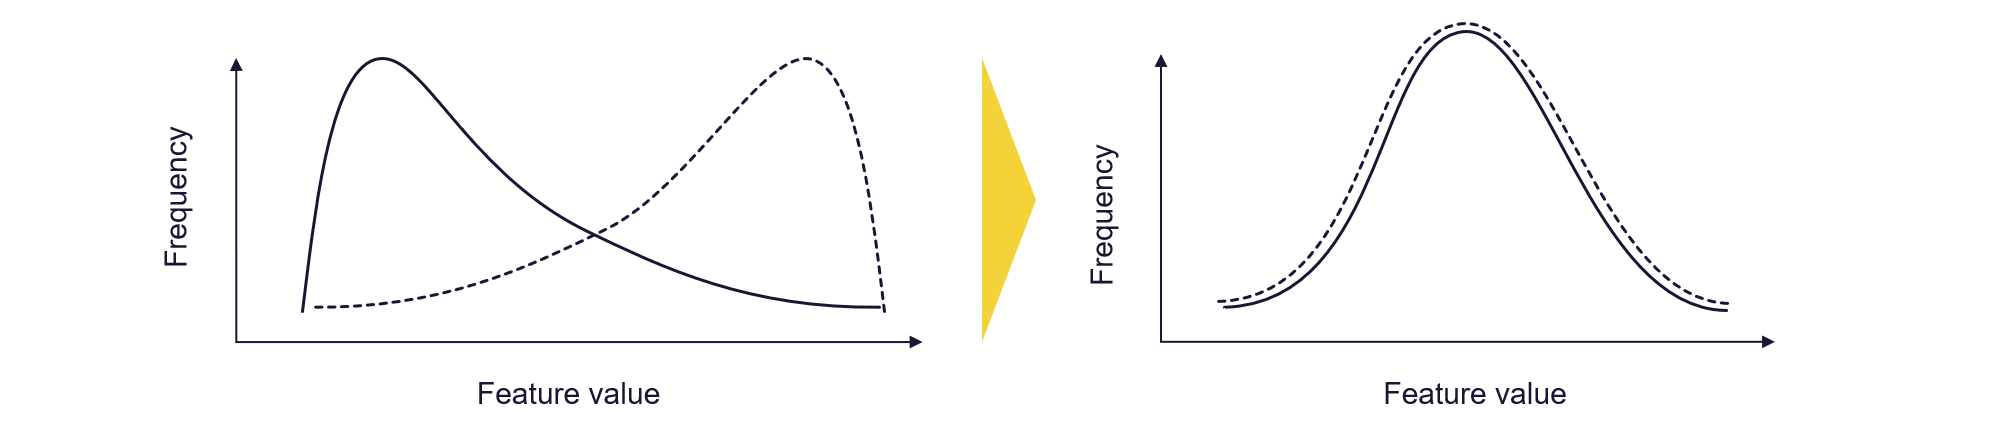

<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color: #646365ff;;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">4.1 Log-Transform
    </h2>
</div>

C:\Users\z004j58u\AppData\Local\Temp\ipykernel_26684\2663776550.py:61: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


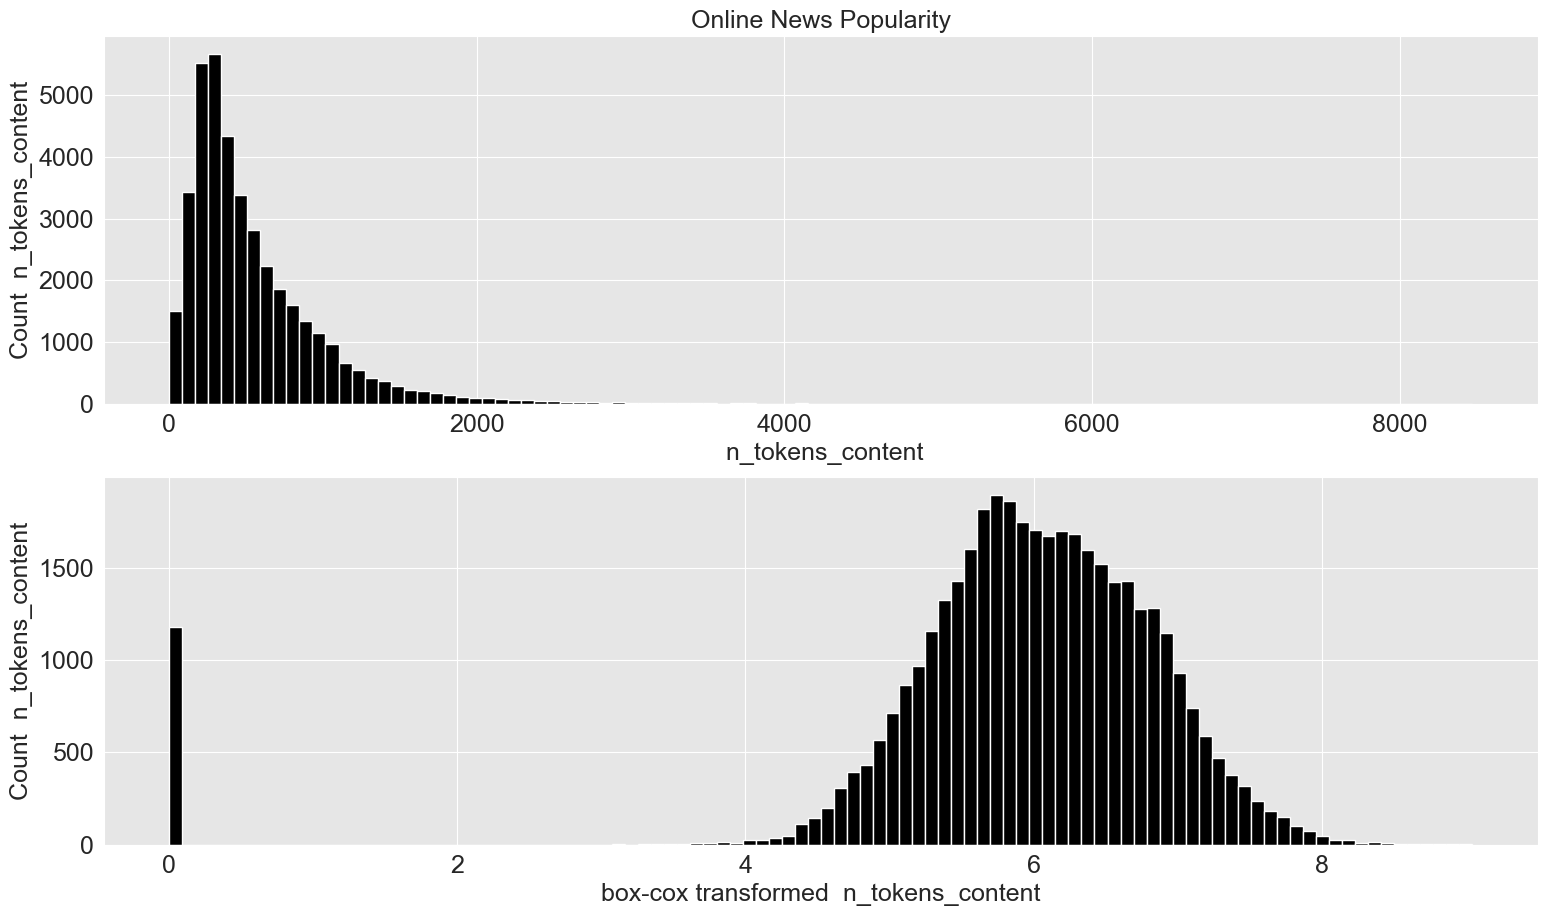

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

def plot_transformer(chosen_dataset, chosen_transformation, chosen_feature = None, box_cox_lambda = 0):
    plt.rcParams['font.size'] = '16'
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})

    ##################################################################################################
    # choose dataset
    ##################################################################################################
    # 1: WorldPopulation data set, 2: OnlineNewsPopularity data set
    #chosen_dataset = 2

    if chosen_dataset == "World Population":
        df = pd.read_csv("../input/world-population-dataset/world_population.csv")
        X_feature = "Area (km²)"
    elif chosen_dataset == "Online News Popularity":
        df = pd.read_csv("../input/uci-online-news-popularity-data-set/OnlineNewsPopularity.csv")
        X_feature = " n_tokens_content"
    elif chosen_dataset == "Housing Data":
        df = pd.read_csv("../input/housing-data-set/HousingData.csv")
        X_feature = "AGE"
        
    # in case you want to plot the histogram for another feature
    if chosen_feature != None:
        X_feature = chosen_feature

    ##################################################################################################
    # choose type of transformation
    ##################################################################################################
    #chosen_transformation = "box-cox" #"log", "box-cox"

    if chosen_transformation == "log":
        def transform_feature(df, X_feature):
            # We add 1 to number_of_words to make sure we don't have a null value in the column to be transformed (0-> -inf) 
            return (np.log10(1+ df[[X_feature]]))
        
    elif chosen_transformation == "box-cox":
        def transform_feature(df, X_feature):
            return stats.boxcox(df[[X_feature]]+1, lmbda=box_cox_lambda)
            #return stats.boxcox(df[X_feature]+1)

    ##################################################################################################
    # plot histogram to chosen dataset and X_feature
    ##################################################################################################
    # figure settings
    fig, (ax1, ax2) = plt.subplots(2)
    fig.set_size_inches(18.5, 10.5)

    ax1.set_title(chosen_dataset)
    ax1.hist(df[[X_feature]], 100, facecolor='black', ec="white")
    ax1.set_ylabel(f"Count {X_feature}")
    ax1.set_xlabel(f"{X_feature}")

    ax2.hist(transform_feature(df, X_feature), 100, facecolor='black', ec="white")
    ax2.set_ylabel(f"Count {X_feature}")
    ax2.set_xlabel(f"{chosen_transformation} transformed {X_feature}")

    fig.show()

plot_transformer(chosen_dataset = "Online News Popularity", chosen_transformation = "box-cox")

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

df = pd.read_csv("../input/uci-online-news-popularity-data-set/OnlineNewsPopularity.csv")
X = df[[" n_tokens_content"]]
y = df[" shares"]

polynomial_features = PolynomialFeatures(degree=5, include_bias=False)

linear_regression = LinearRegression()
pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ]
)

#########################################################################
# Fit model with raw data
#########################################################################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pd.DataFrame(y_test)
y_pred = y_pred.assign(y_pred=pipeline.predict(X_test))
y_pred

,shares,y_pred
32340,2900,2996.742052
10480,1300,3006.848695
15370,17700,3578.494190
31592,1500,3779.891406
198,1400,3424.120918
...,...,...
19771,759,3603.241699
31012,1200,4511.660189
6020,2000,2875.592538
27091,9400,3897.549288


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import plotly.graph_objects as go
import pandas as pd
from scipy import stats
import plotly.express as px
import seaborn as sns

def plot_cross_val_score_comparison(chosen_dataset):
    scores_raw = []
    scores_transformed = []
    degrees = []

    if chosen_dataset == "World Population":
        df = pd.read_csv("../input/world-population-dataset/world_population.csv")
        X = df[["Area (km²)"]]
        y = df["2022 Population"]
    elif chosen_dataset == "Online News Popularity":
        df = pd.read_csv("../input/uci-online-news-popularity-data-set/OnlineNewsPopularity.csv")
        X = df[[" n_tokens_content"]]
        y = df[" shares"]

    for i in range(1,10):
        degree = i
        polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)

        linear_regression = LinearRegression()
        pipeline = Pipeline(
            [
                ("polynomial_features", polynomial_features),
                ("linear_regression", linear_regression),
            ]
        )

        # Evaluate the models using crossvalidation
        scores = cross_val_score(
            pipeline, X, y, scoring="neg_mean_absolute_error", cv=5
        )

        
        scores_raw.append(scores.mean())
        degrees.append(i)
        
        #########################################################################
        # Fit model with transformed data
        #########################################################################
        def transform_feature(X):
            # We add 1 to number_of_words to make sure we don't have a null value in the column to be transformed (0-> -inf) 
            #return (np.log10(1+ X))
            return stats.boxcox(X+1, lmbda=0)

        X_trans = transform_feature(X)

        pipeline.fit(X_trans, y)

        # Evaluate the models using crossvalidation
        scores = cross_val_score(
            pipeline, X_trans, y, scoring="neg_mean_absolute_error", cv=5
        )

        scores_transformed.append(scores.mean())

    plot_df = pd.DataFrame(degrees, columns=["degrees"])
    plot_df = plot_df.assign(scores_raw = np.abs(scores_raw))
    plot_df = plot_df.assign(scores_transformed = np.abs(scores_transformed))

    fig = go.Figure()
    fig.add_scatter(x=plot_df["degrees"], y=plot_df["scores_transformed"], name="Scores Transformed", line=dict(color="#0000ff"))

    # Only thing I figured is - I could do this 
    #fig.add_scatter(x=plot_df['degrees'], y=plot_df['scores_transformed'], title='Scores Raw')  
    fig.add_scatter(x=plot_df['degrees'], y=plot_df['scores_raw'], name='Scores Raw')

    # write scores for raw and transformed data in one data frame and find degree that shows the mininmal error score
    scores_df = pd.DataFrame(np.array([degrees,scores_raw, scores_transformed]).transpose(), columns=["degrees", "scores_raw", "scores_transformed"]).abs()
    scores_df_merged = scores_df[["degrees","scores_raw"]].rename(columns={"scores_raw":"scores"}).append(scores_df[["degrees", "scores_transformed"]].rename(columns={"scores_transformed":"scores"}))
    degree_best_performance = scores_df_merged[scores_df_merged["scores"]==scores_df_merged["scores"].min()]["degrees"]

    # plot a vertical line
    fig.add_vline(x=int(degree_best_performance), line_width=3, line_dash="dash", line_color="red", name="Best Performance")

    # update plot layout
    fig.update_layout(
        font=dict(
            family="Arial",
            size=18,  # Set the font size here
            color="Black"
        ),
        xaxis_title="Degree",
        yaxis_title="Mean Absolute Error",
        showlegend=True,
        width=1200,
        height=400,
    )

    fig['data'][0]['line']['color']="grey"
    fig['data'][1]['line']['color']="black"

    fig.show()
    return degree_best_performance

In [19]:
degree_best_performance = plot_cross_val_score_comparison(chosen_dataset="World Population")

C:\Users\z004j58u\AppData\Local\Temp\ipykernel_26684\2239896344.py:80: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [20]:
degree_best_performance = plot_cross_val_score_comparison(chosen_dataset="Online News Popularity")

C:\Users\z004j58u\AppData\Local\Temp\ipykernel_26684\2239896344.py:80: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def plot_polynomial_regression_model(chosen_dataset, chosen_transformation):
    # fig settings
    plt.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))


    if chosen_dataset == "World Population":
        df = pd.read_csv("../input/world-population-dataset/world_population.csv")
        y_column = "2022 Population"
        X_column = "Area (km²)"
        X = df[[X_column]]
        y = df[y_column]
    elif chosen_dataset == "Online News Popularity":
        df = pd.read_csv("../input/uci-online-news-popularity-data-set/OnlineNewsPopularity.csv")
        y_column = " shares"
        X_column = " n_tokens_content"
        X = df[[X_column]]
        y = df[y_column]
            
    #########################################################################
    # Define model
    #########################################################################
    # degree_best_performance was calculated in the cell above
    degree = int(degree_best_performance)
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)

    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )

    #########################################################################
    # Fit model
    #########################################################################
    pipeline.fit(X, y)

    ######################################################################################
    # Fit model and plot raw features
    ######################################################################################
    reg = pipeline.fit(X, y)
    X_pred = np.linspace(min(X.iloc[:,0]), max(X.iloc[:,0]),1000).reshape(-1,1)
    X_pred = pd.DataFrame(X_pred)
    X_pred.columns = [X.columns[0]]
    y_pred_1 = reg.predict(X_pred)

    # plot model and transformed data    
    ax[0].scatter(X, y, color='#f3d23aff')
    ax[0].plot(X_pred, y_pred_1, color='black')
    ax[0].set_xlabel(f"{X_column}")
    ax[0].set_ylabel(f"{y_column}")
    ax[0].set_title(f"Raw features / Poly. Regression (degree={degree})", pad=20)

    #########################################################################
    # Fit model with transformed data
    #########################################################################
    def transform_feature(X, chosen_transformation):
        # We add 1 to number_of_words to make sure we don't have a null value in the column to be transformed (0-> -inf) 
        if chosen_transformation == "log":
            return (np.log10(1+ X))
        if chosen_transformation == "box-cox":
            return stats.boxcox(X+1, lmbda=0)

    X_trans = transform_feature(X, chosen_transformation)

    # fit model with transformed data
    reg = pipeline.fit(X_trans, y)

    # define X_pred
    X_pred = np.linspace(min(X_trans.iloc[:,0]), max(X_trans.iloc[:,0]),1000).reshape(-1,1)
    X_pred = pd.DataFrame(X_pred)
    X_pred.columns = [X.columns[0]]

    # predict
    y_pred_2 = reg.predict(X_pred)
        
    # plot model and transformed data    
    ax[1].scatter(X_trans, y, color='#f3d23aff')
    ax[1].plot(X_pred, y_pred_2, color='black')
    ax[1].set_xlabel(f"{chosen_transformation} Transformed {X_column}")
    ax[1].set_ylabel(f"{y_column}")
    # calc cross val score and add to title
    ax[1].set_title(f"Transformed features  / Poly. Regression (degree={degree})", pad=20)

    fig.suptitle(chosen_dataset)
    fig.tight_layout()


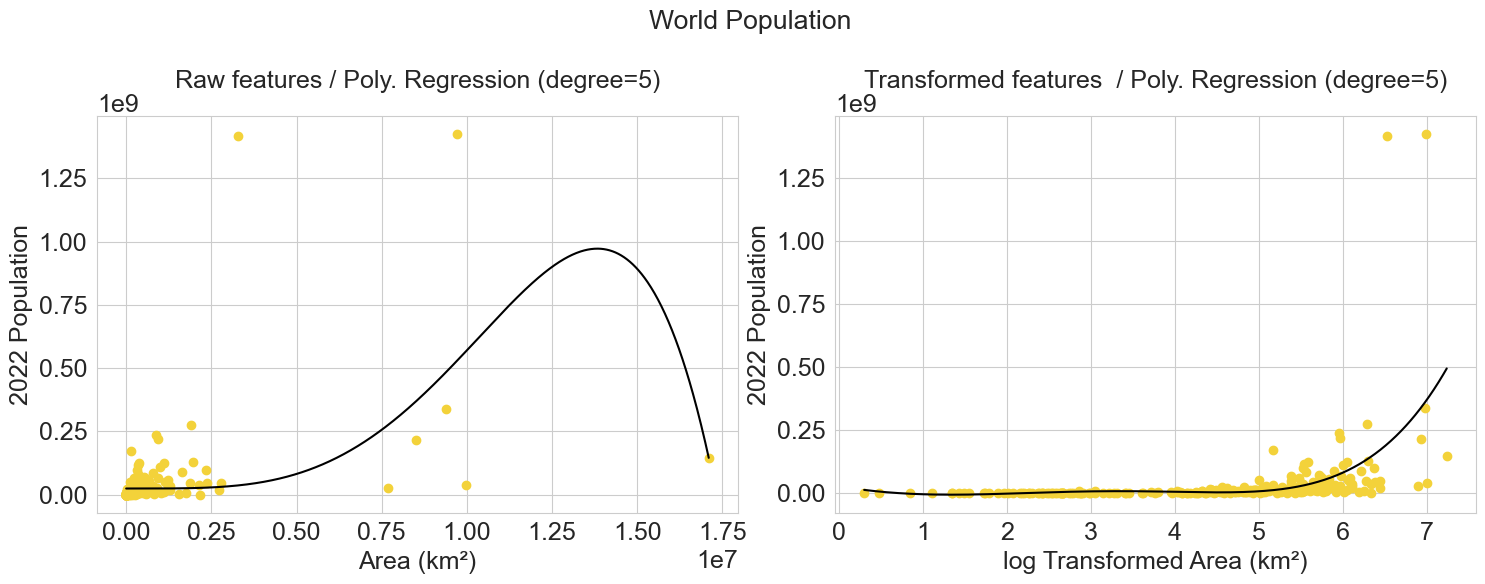

In [35]:
plot_polynomial_regression_model(chosen_dataset = "World Population", chosen_transformation = "log")

<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color: #646365ff;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">4.2 Box-Cox Function
    </h2>
</div>

In many modeling scenarios, normality of the features in a dataset is desirable. Power transforms are a family of parametric, monotonic transformations that aim to map data from any distribution to as close to a Gaussian distribution as possible in order to stabilize variance and minimize skewness.

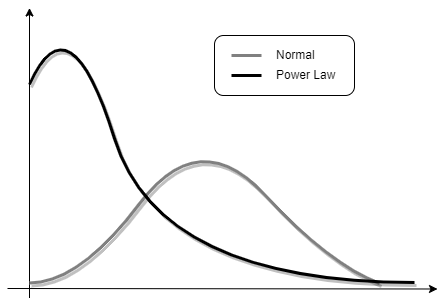

[[Rdocumentation22]](https://www.rdocumentation.org/packages/forecast/versions/8.11/topics/BoxCox)

$$
\begin{split}x_i^{(\lambda)} =
\begin{cases}
\dfrac{x_i^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0, \\[8pt]
\ln{(x_i)} & \text{if } \lambda = 0,
\end{cases}\end{split}
$$

C:\Users\z004j58u\AppData\Local\Temp\ipykernel_26684\2663776550.py:61: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



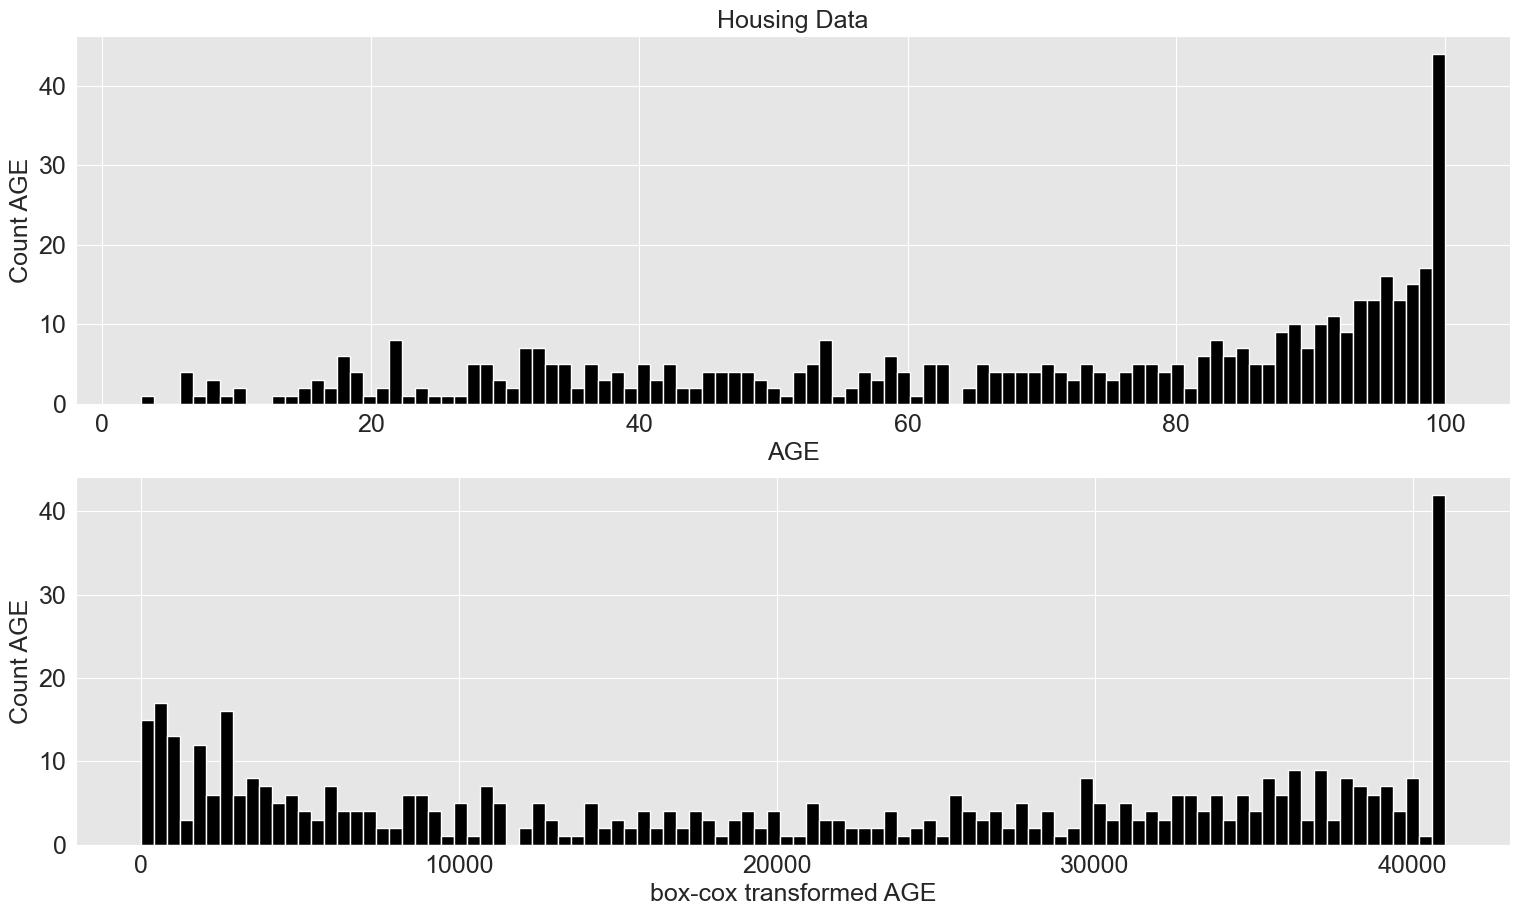

In [36]:
import seaborn as sns

plot_transformer(chosen_dataset = "Housing Data", chosen_transformation = "box-cox", chosen_feature = None, box_cox_lambda = 2.5)

<a id="1"></a>
# <p style="padding:10px;background-color:#f3d23aff;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">5. Normalize / Standardize</p>

## Normalize and Standardize using Scikit-learn

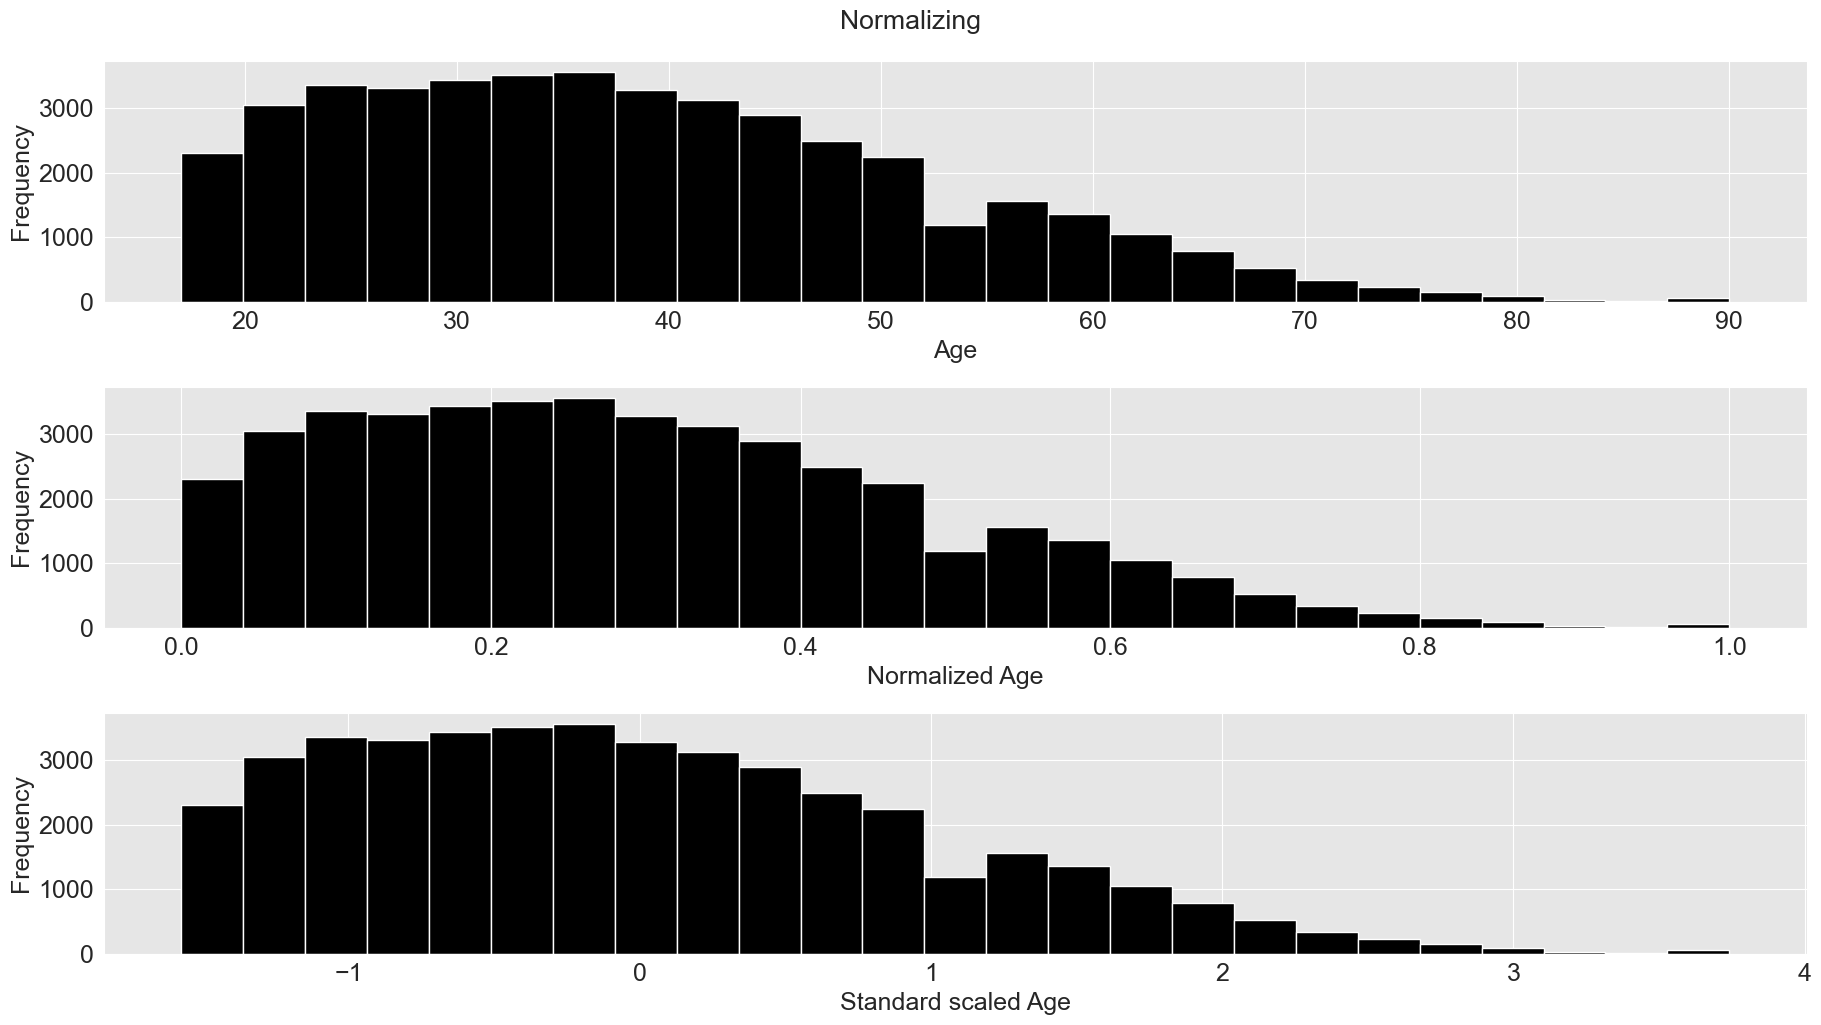

In [25]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['font.size'] = '16'
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# load data set
census_income = pd.read_csv(r'../input/income/train.csv')

X = census_income[["age"]]

# fit scaler and transform data
X_norm = MinMaxScaler().fit_transform(X)
X_scaled = StandardScaler().fit_transform(X)

# plots
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('Normalizing')
fig.set_size_inches(18.5, 10.5)

# subplot 1 - raw data
ax1.hist(X, 25, facecolor='black', ec="white")
ax1.set_xlabel("Age")
ax1.set_ylabel("Frequency")

# subplot 2 - normalizer
ax2.hist(X_norm, 25, facecolor='black', ec="white")
ax2.set_xlabel("Normalized Age")
ax2.set_ylabel("Frequency")

# subplot 3 - standard scaler
ax3.hist(X_scaled, 25, facecolor='black', ec="white")
ax3.set_xlabel("Standard scaled Age")
ax3.set_ylabel("Frequency")

fig.tight_layout()

<a id="1"></a>
# <p style="padding:10px;background-color:#f3d23aff;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">6. Feature Crossing</p>

Feature crossing is the process of connecting multiple features from a dataset together, and using it to create a new feature. This can include combining data from other sources to emphasize existing correlations or make it easier for the algorithm to understand.

A well-known ML technique that already works on this principle from the ground up is Polynomial Regression. Scikit-learn, for example, does not contain a direct function for polynomial regression, we train polynomial models by applying Feature Crossing to the data before training a Linear Regression Model.

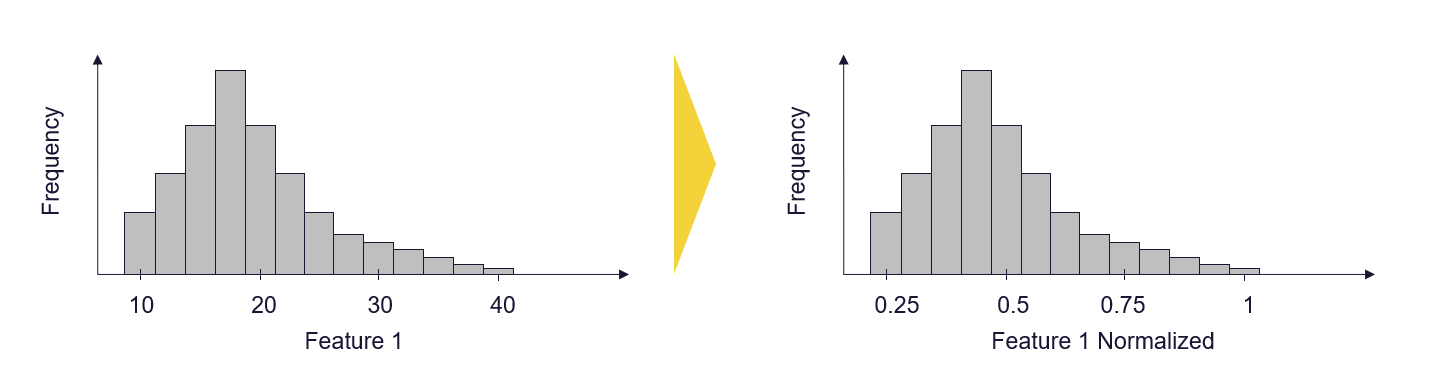

In [26]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Raw input features
X = np.arange(6).reshape(3, 2)
print("Raw input matrix:")
display(X)

# Crossed features
poly = PolynomialFeatures(2, include_bias=False)
print("Transformed feature matrix:")
poly.fit_transform(X)

Raw input matrix:


array([[0, 1],
       [2, 3],
       [4, 5]])

Transformed feature matrix:


array([[ 0.,  1.,  0.,  0.,  1.],
       [ 2.,  3.,  4.,  6.,  9.],
       [ 4.,  5., 16., 20., 25.]])

C:\Users\z004j58u\AppData\Local\Temp\ipykernel_26684\1357394901.py:50: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



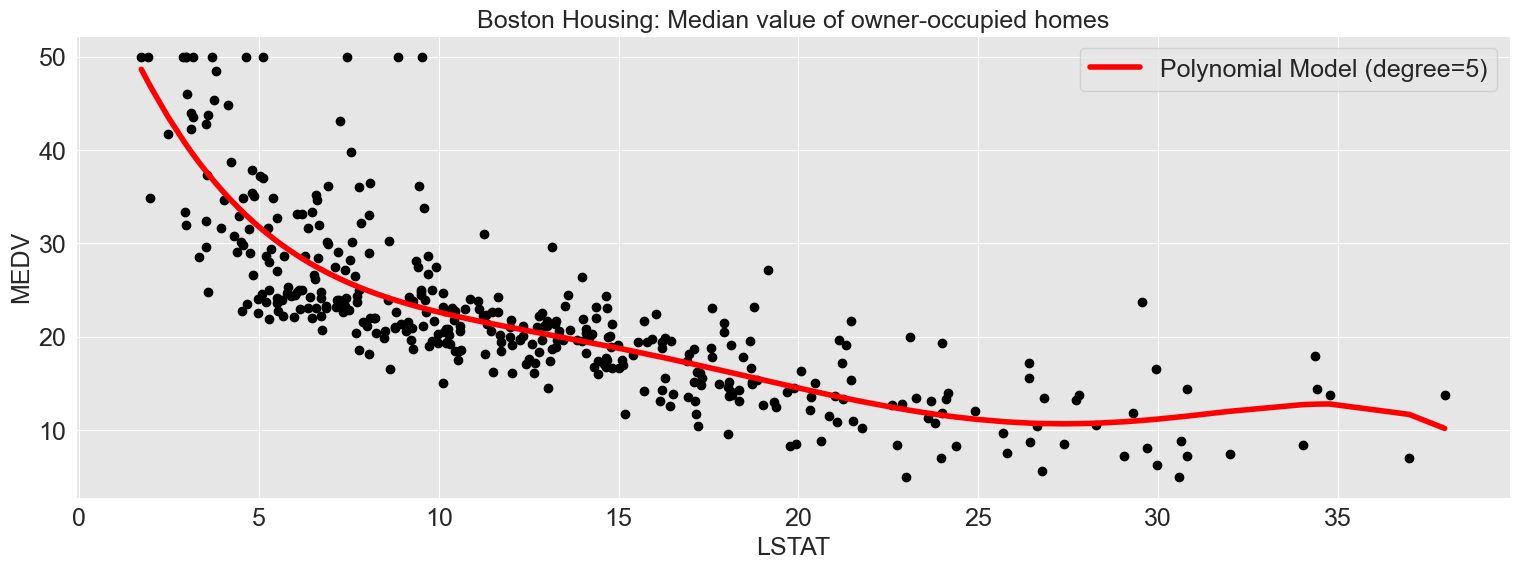

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['font.size'] = '16'
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# load data set: Boston Housing
boston_housing_df = pd.read_csv("../input/housing-data-set/HousingData.csv")
boston_housing_df = boston_housing_df.dropna()
boston_housing_df = boston_housing_df.sort_values(by=["LSTAT"])

# define x and target variable y
X = boston_housing_df[["LSTAT"]]
y = boston_housing_df["MEDV"]

# fit model and create predictions
degree = 5
polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ]
)
pipeline.fit(X, y)

y_pred = pipeline.predict(X)

# train linear model
regr = LinearRegression()
regr.fit(X,y)

# figure settings
fig, (ax1) = plt.subplots(1)
fig.set_size_inches(18.5, 6)

ax1.set_title("Boston Housing: Median value of owner-occupied homes")
ax1.scatter(X, y, c="black")
ax1.plot(X, y_pred, c="red", linewidth=4, label=f"Polynomial Model (degree={degree})")
ax1.set_ylabel(f"MEDV")
ax1.set_xlabel(f"LSTAT")
ax1.legend()

fig.show()

## Feature Crossing in Classification

In [28]:
from sklearn.datasets import make_circles
from sklearn import preprocessing
import plotly_express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.rcParams['font.size'] = '30'

# generate data set
X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X = preprocessing.scale(X)

X=X[500:]
y=y[500:]

# define target value, here: binary classification, class 1 or class 2
y=np.where(y==0,"class 1","class 2")

# define x1 and x2 of a 2-dimensional data set
x1 = X[:,0]
x2 = X[:,1]

import plotly_express as px
# define the kernel function
kernel = x1*x2 + x1**2 + x2**2

circle_df = pd.DataFrame(X).rename(columns={0:"x1", 1:"x2"})
circle_df = circle_df.assign(y=y)

color_discrete_map = {circle_df.y.unique()[0]: "black", circle_df.y.unique()[1]: "#f3d23a"}
px.scatter(circle_df, x="x1", y="x2", color="y", color_discrete_map = color_discrete_map, width=1000, height=800)

# plot the data set together with the kernel value in a 3-dimensional space
color_discrete_map = {circle_df.y.unique()[0]: "black", circle_df.y.unique()[1]: "grey"}
fig = px.scatter(circle_df, x="x1", y="x2", color="y", color_discrete_map = color_discrete_map, width=1000, height=600)
fig.update_layout(
    font=dict(
        family="Arial",
        size=24,  # Set the font size here
        color="Black"
    ),
    showlegend=True,
    width=1200,
    height=800,
)

In [29]:
import plotly_express as px

# define the kernel function
kernel = x1*x2 + x1**2 + x2**2

kernel_df = pd.DataFrame(X).rename(columns={0:"x1", 1:"x2"})
kernel_df = kernel_df.assign(kernel=kernel)
kernel_df = kernel_df.assign(y=y)

# plot the data set together with the kernel value in a 3-dimensional space
color_discrete_map = {kernel_df.y.unique()[0]: "black", kernel_df.y.unique()[1]: "grey"}  
px.scatter_3d(kernel_df, x="x1", y="x2", z="kernel", color="y", width=1000, height=600)

<a id="1"></a>
# <p style="padding:10px;background-color:#f3d23aff;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">7. Principal Component Analysis (PCA)</p>

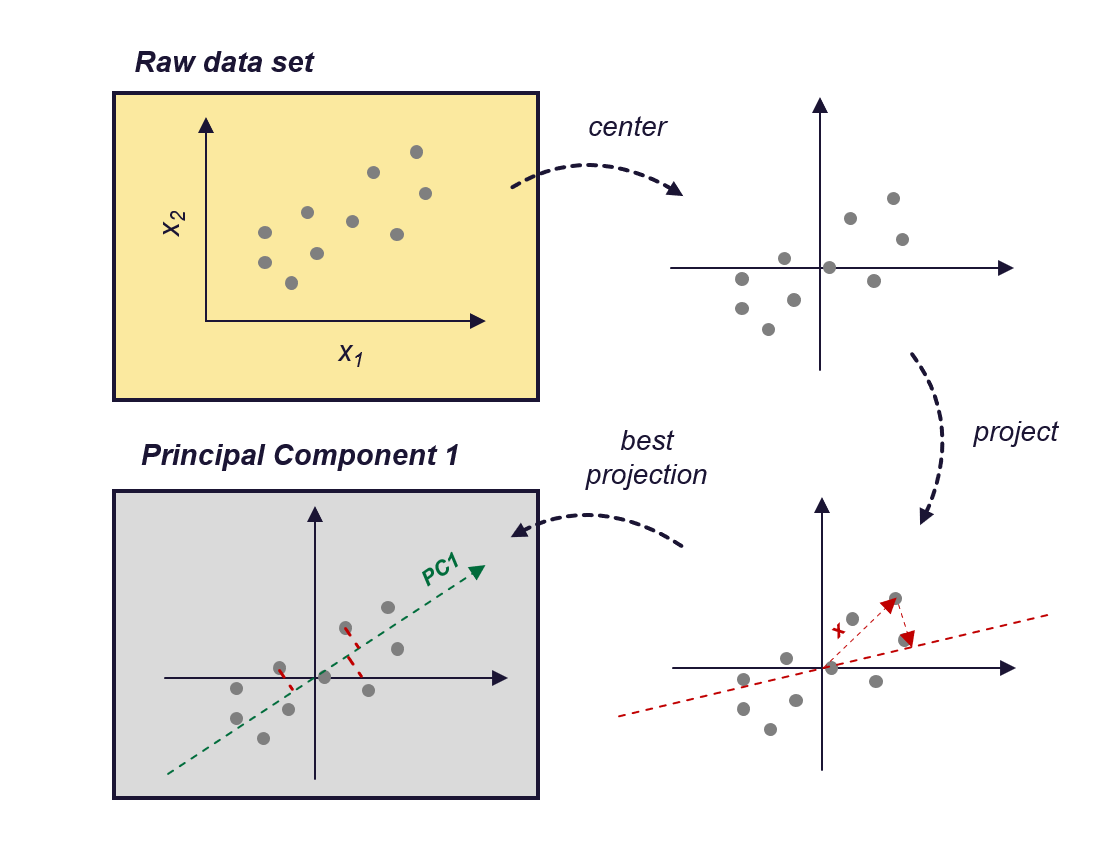

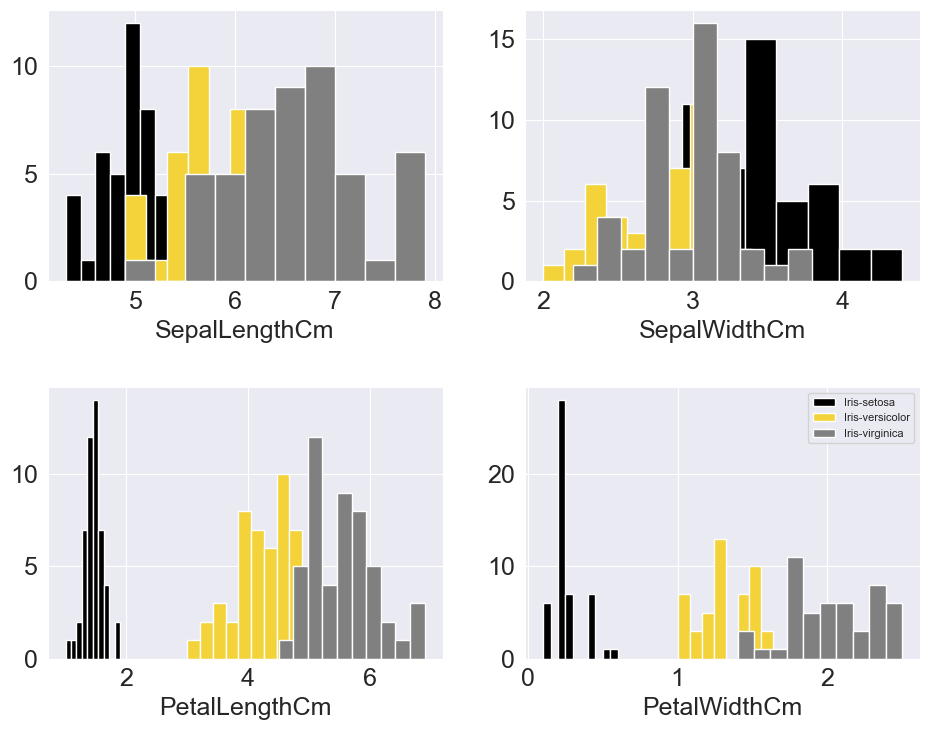

In [30]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import math

import pandas as pd

# Load the Iris dataset
iris_data = pd.read_csv(r'../input/iris-data/Iris.csv')
iris_data.dropna(how="all", inplace=True) # drops the empty line at file-end

sns.set_style("whitegrid")
colors = ["black", "#f3d23aff", "grey"]
plt.figure(figsize=(10, 8))

with sns.axes_style("darkgrid"):
    for cnt, column in enumerate(iris_data.columns[1:5]):
        plt.subplot(2, 2, cnt+1)
        for species_cnt, species in enumerate(iris_data.Species.unique()):
            plt.hist(iris_data[iris_data.Species == species][column], label=species, color=colors[species_cnt])

        plt.xlabel(column)
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

In [31]:
import plotly_express as px

color_discrete_map = {iris_data.Species.unique()[0]: "black", iris_data.Species.unique()[1]: "#f3d23a", iris_data.Species.unique()[2]:"grey"}

px.scatter_3d(iris_data, x="PetalLengthCm", y="PetalWidthCm", z="SepalLengthCm", size="SepalWidthCm", color="Species", color_discrete_map = color_discrete_map, width=1000, height=800)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib
import plotly.graph_objects as go

# Load the Iris dataset
iris_data = pd.read_csv(r'../input/iris-data/Iris.csv')
iris_data.dropna(how="all", inplace=True) # drops the empty lines

# define X
X = iris_data[["PetalLengthCm", "PetalWidthCm", "SepalLengthCm", "SepalWidthCm"]]

# plot 2d plot
color_discrete_map = {iris_data.Species.unique()[0]: "black", iris_data.Species.unique()[1]: "#f3d23a", iris_data.Species.unique()[2]:"grey"}
fig = px.scatter(iris_data, x="PetalLengthCm", y="PetalWidthCm", color="Species", color_discrete_map = color_discrete_map)

fig.update_layout(
    font=dict(
        family="Arial",
        size=24,  # Set the font size here
        color="Black"
    ),
    showlegend=True,
    width=1200,
    height=800,
)

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib
import plotly.graph_objects as go

# Load the Iris dataset
iris_data = pd.read_csv(r'../input/iris-data/Iris.csv')
iris_data.dropna(how="all", inplace=True) # drops the empty lines

# define X
X = iris_data[["PetalLengthCm", "PetalWidthCm", "SepalLengthCm", "SepalWidthCm"]]

# fit PCA and transform X
pca = PCA(n_components=2).fit(X)
X_transform = pca.transform(X)
iris_data_trans = pd.DataFrame(X_transform).assign(Species = iris_data.Species).rename(columns={0:"PC1", 1:"PC2"})

# plot 2d plot
color_discrete_map = {iris_data.Species.unique()[0]: "black", iris_data.Species.unique()[1]: "#f3d23a", iris_data.Species.unique()[2]:"grey"}
fig = px.scatter(iris_data_trans, x="PC1", y="PC2", color="Species", color_discrete_map = color_discrete_map)

fig.update_layout(
    font=dict(
        family="Arial",
        size=24,  # Set the font size here
        color="Black"
    ),
    showlegend=True,
    width=1200,
    height=800,
)